## 羅吉斯迴歸

### 生成三組資料

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

#生成資料
def GenDataforThree(seed,n1,n2,n3,mu1,mu2,mu3,Cov1,Cov2,Cov3):
    rng = np.random.default_rng(seed = seed)
    mvn1 = rng.multivariate_normal(mean = mu1 ,cov = Cov1 ,size = n1)
    mvn2 = rng.multivariate_normal(mean = mu2 ,cov = Cov2 ,size = n2)
    mvn3 = rng.multivariate_normal(mean = mu3 ,cov = Cov3 ,size = n3)
    x = np.vstack((mvn1,mvn2,mvn3))
    y = np.hstack((np.zeros(n1),np.ones(n2),np.repeat(2, n3)))
    D = np.c_[x, y]
    return D

### 資料分布

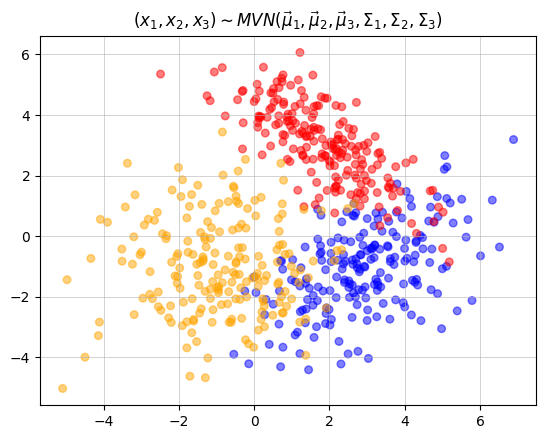

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
################# 生成資料 #####################
D = GenDataforThree(seed = 123 ,
                     n1 = 200 ,n2 = 200 ,n3=200 ,
                     mu1 = np.array([3, -1]) ,mu2 = np.array([2, 3]) ,mu3 = np.array([-1, -1])
                    ,Cov1 = np.array([[2, 1], [1, 2]]) ,Cov2 = np.array([[1.5, -1], [-1, 1.5]]) 
                    ,Cov3 = np.array([[2, 0], [0, 3]])
                    )

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)

colors = ['blue' if i == 0 else 'red' if i==1 else 'orange' for i in D[:,2]]
plot = ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax.set_title(f'$(x_1,x_2,x_3)\sim MVN(\\vec\mu_1,\\vec\mu_2,\\vec\mu_3,\\Sigma_1,\\Sigma_2,\\Sigma_3)$')

plt.savefig('statcomp_hw4_plot14.png')

### 建立羅吉斯迴歸 

訓練模型

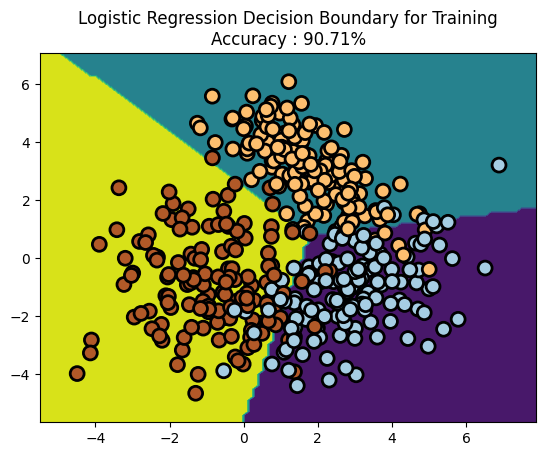

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# 假設 GenDataforThree 函數已經正確定義

################# 資料前處理 ###################### 
D = GenDataforThree(seed = 123 ,
                     n1 = 200 ,n2 = 200 ,n3=200 ,
                     mu1 = np.array([3, -1]) ,mu2 = np.array([2, 3]) ,mu3 = np.array([-1, -1])
                    ,Cov1 = np.array([[2, 1], [1, 2]]) ,Cov2 = np.array([[1.5, -1], [-1, 1.5]]) 
                    ,Cov3 = np.array([[2, 0], [0, 3]])
                    )

X = D[:, 0:2]
y = D[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################### 建立模型 #######################
# 使用 sklearn 中的 LogisticRegression 模型
model = LogisticRegression()

# 將模型擬合到訓練數據上
model.fit(X_train, y_train)

# 在測試數據上進行預測
y_pred = model.predict(X_train)

# 計算準確率
accuracy = np.mean(y_pred == y_train)

# 繪製決策邊界
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X_train, ax=ax)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, linewidth=2, cmap=plt.cm.Paired)
ax.set_title(f'Logistic Regression Decision Boundary for Training\nAccuracy : {100*accuracy:.2f}%')

plt.savefig('statcomp_hw4_plot15.eps')

預測測試資料

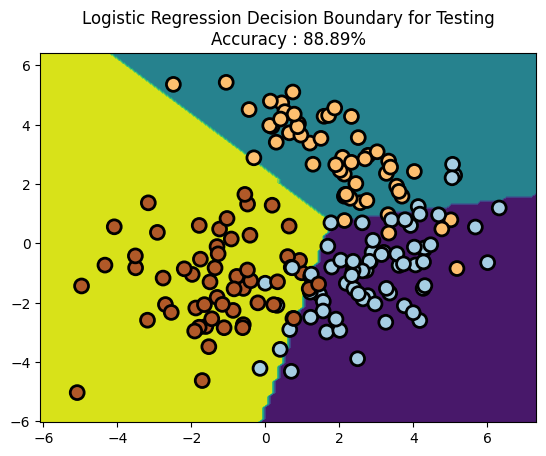

In [12]:
model = LogisticRegression()

# 將模型擬合到訓練數據上
model.fit(X_train, y_train)

# 在測試數據上進行預測
y_pred = model.predict(X_test)

# 計算準確率
accuracy = np.mean(y_pred == y_test)

# 繪製決策邊界
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X_test, ax=ax)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=100, linewidth=2, cmap=plt.cm.Paired)
ax.set_title(f'Logistic Regression Decision Boundary for Testing\nAccuracy : {100*accuracy:.2f}%')

plt.savefig('statcomp_hw4_plot16.eps')